In [8]:
from algorithm_ranking import MeasurementsVisualizer, MeasurementsSimulator, RankBFS, CompareAlgs

In [9]:
import numpy as np
import pandas as pd

In [22]:
def measure_and_rank2(measurements_manager, h0, rep_steps=3, eps=0.001, max_rep=50, q_min=25, q_max=75):

    initial_ranks = []
    for i, j in enumerate(h0):
        initial_ranks.append([j, i])
    rank_h0 = pd.DataFrame(initial_ranks, columns=['case:concept:name', 'case:rank'])
    rank_log = []
    rank_log.append(rank_h0.set_index('case:concept:name'))

    dy = np.ones(len(h0)-1)
    run_id = 0
    norm = 1
    while norm > eps and run_id * rep_steps < max_rep:
        measurements_manager.measure(run_id=run_id, rep_steps=rep_steps)
        alg_measurements = measurements_manager.get_alg_measurements()

        compareAlgs = CompareAlgs(alg_measurements, h0)
        rank_variants = RankBFS(h0,compareAlgs)
        
        #s, mr = rank_variants.calculate_mean_rank()
        dfgs, s = rank_variants.rank_algorithms(q_min=q_min,q_max=q_max)

        rank_log.append(s.set_index('case:concept:name'))
        print(s)
        df = rank_h0.merge(s, on=['case:concept:name'])
        x = df.iloc[:, -1].values
        dx = np.convolve(x, [1, -1], 'valid')

        norm = np.linalg.norm(dx - dy, 2) / len(h0)
        print("norm: {}".format(norm))

        dy = dx.copy()
        #h0 = list(s['case:concept:name'])
        print(h0)

        run_id = run_id + 1

    num_measurements = (run_id) * rep_steps
    print("Number of measurements: {}".format(num_measurements))

    return s, dfgs[-1], pd.concat(rank_log, axis=1)

In [28]:
cfg = {}
sigma = 0.1
cfg['alg0']  = [0.5,sigma] #[mean, std]
cfg['alg1']  = [0.5,sigma]
cfg['alg2']  = [0.5,sigma]
cfg['alg3']  = [0.6,sigma]
cfg['alg4']  = [0.6,sigma]
cfg['alg5']  = [0.6,sigma]
h0 = list(cfg.keys())

In [29]:
ms = MeasurementsSimulator(cfg, 'normal', seed=152)  

In [30]:
#ms.measure(10,1)

In [31]:
# compareAlgs = CompareAlgs(ms.get_alg_measurements(), h0)
# rank = RankBFS(h0,compareAlgs)
# g, s = rank.rank_algorithms(q_min=25,q_max=75)

In [32]:
s, g, log = measure_and_rank2(ms,h0,rep_steps=3, max_rep=30, q_min=25, q_max=75)

Adding edge from alg0 to alg1
Adding edge from alg1 to alg2
Adding edge from alg2 to alg3
Adding edge from alg3 to alg4
Adding edge from alg4 to alg5
Adding edge from alg0 to alg1
Adding edge from alg1 to alg2
Adding edge from alg2 to alg3
Adding edge from alg3 to alg4
Adding edge from alg4 to alg5
['alg0'] alg1
Removing edge from alg0 to alg1
Adding edge from alg0 to alg2
['alg1', 'alg0'] alg2
Removing edge from alg1 to alg2
Removing edge from alg0 to alg2
Adding edge from alg0 to alg3
Adding edge from alg1 to alg3
['alg2', 'alg0', 'alg1'] alg3
['alg3'] alg4
Adding edge from alg0 to alg4
Adding edge from alg1 to alg4
Adding edge from alg2 to alg4
Removing edge from alg3 to alg4
Adding edge from alg3 to alg5
['alg0', 'alg1', 'alg2'] alg4
['alg4', 'alg3'] alg5
Adding edge from alg0 to alg5
Adding edge from alg1 to alg5
Adding edge from alg2 to alg5
Removing edge from alg4 to alg5
Removing edge from alg3 to alg5
['alg0', 'alg1', 'alg2'] alg5
None None
  case:concept:name  case:rank:q25-q

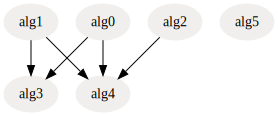

In [33]:
g

In [34]:
#g.render('dfg152-0.01')

In [35]:
s

,case:concept:name,case:rank:q25-q75
0,alg0,0
1,alg1,0
2,alg2,0
5,alg5,0
3,alg3,1
4,alg4,1


In [36]:
log

,case:rank,case:rank:q25-q75,case:rank:q25-q75,case:rank:q25-q75
case:concept:name,,,,
alg0,0,0,0,0
alg1,1,0,0,0
alg2,2,0,0,0
alg3,3,1,1,1
alg4,4,1,1,1
alg5,5,1,0,0


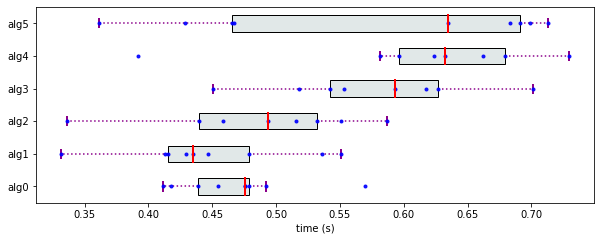

In [37]:
mv = MeasurementsVisualizer(ms.get_alg_measurements(), h0)
fig = mv.show_measurements_boxplots(scale=0.6)

In [14]:
#fig.savefig('v152-0.01.pdf')

In [13]:
np.__version__

'1.22.3'

In [496]:
cfg = {}
sigma = 0.1
cfg['alg0']  = [0.5,sigma] #[mean, std]
cfg['alg1']  = [0.5,sigma]
cfg['alg2']  = [0.5,sigma]
cfg['alg3']  = [0.5,sigma]
cfg['alg4']  = [0.5,sigma]
cfg['alg5']  = [0.5,sigma]
h0 = list(cfg.keys())

In [158]:
ms = MeasurementsSimulator(cfg, 'normal', seed=152)  

In [159]:
ms.measure(10,1)

In [160]:
compareAlgs = CompareAlgs(ms.get_alg_measurements(), h0)
rank = RankBFS(h0,compareAlgs)
g, s = rank.rank_algorithms(q_min=25,q_max=75)

Adding edge from alg0 to alg1
Adding edge from alg1 to alg2
Adding edge from alg2 to alg3
Adding edge from alg3 to alg4
Adding edge from alg4 to alg5
Adding edge from alg0 to alg1
Adding edge from alg1 to alg2
Adding edge from alg2 to alg3
Adding edge from alg3 to alg4
Adding edge from alg4 to alg5
['alg0'] alg1
Removing edge from alg0 to alg1
Adding edge from alg0 to alg2
['alg1', 'alg0'] alg2
Removing edge from alg1 to alg2
Removing edge from alg0 to alg2
Adding edge from alg0 to alg3
Adding edge from alg1 to alg3
['alg2', 'alg0', 'alg1'] alg3
Removing edge from alg2 to alg3
Removing edge from alg0 to alg3
Removing edge from alg1 to alg3
Adding edge from alg0 to alg4
Adding edge from alg1 to alg4
Adding edge from alg2 to alg4
['alg3', 'alg0', 'alg1', 'alg2'] alg4
Removing edge from alg3 to alg4
Removing edge from alg0 to alg4
Removing edge from alg1 to alg4
Removing edge from alg2 to alg4
Adding edge from alg0 to alg5
Adding edge from alg1 to alg5
Adding edge from alg2 to alg5
Adding

In [156]:
#s, g, log = measure_and_rank2(ms,h0, max_rep=30)

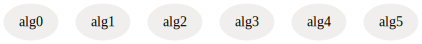

In [162]:
g[-1]

In [164]:
s

,case:concept:name,case:rank:q25-q75
0,alg0,0
1,alg1,0
2,alg2,0
3,alg3,0
4,alg4,0
5,alg5,0


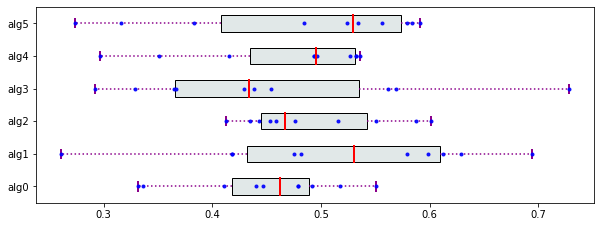

In [163]:
mv = MeasurementsVisualizer(ms.get_alg_measurements(), h0)
fig = mv.show_measurements_boxplots(scale=0.6)